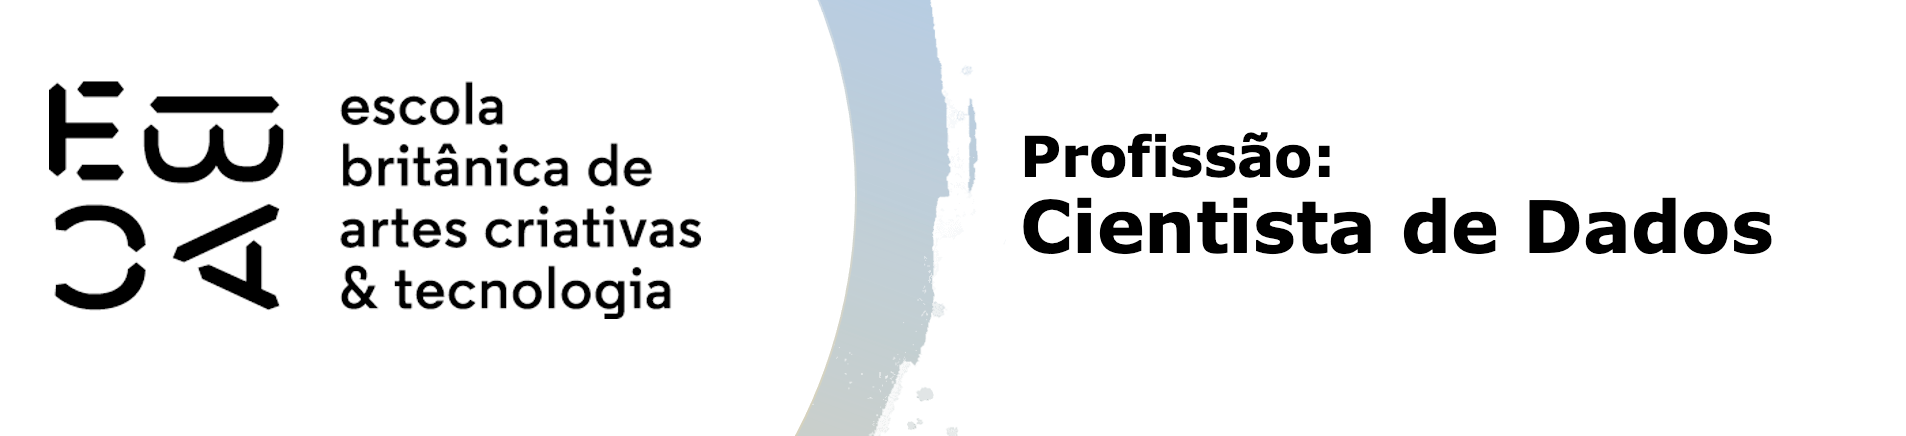

# Regressão III - Tarefa

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from datetime import datetime, timedelta
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

import warnings
warnings.filterwarnings("ignore")


In [87]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [89]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [90]:
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [92]:
df.reset_index(drop=False, inplace=True)
df['data_ref'] = pd.to_datetime(df['data_ref'])
data_max=df['data_ref'].max()
limite_3_meses = data_max - timedelta(days=90)
df_test=df[df['data_ref'] >= limite_3_meses]
df_train=df[df['data_ref'] < limite_3_meses]
df_train

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35
599996,2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48
599997,2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20
599998,2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [98]:
res_1 = smf.ols('''renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda 
               + educacao + estado_civil + tipo_residencia + idade + tempo_emprego''',data=df_train).fit()

pred = pd.DataFrame()
pred['primeiro_modelo'] = res.predict(df_test)
print(f'R-quadrado: {res.rsquared_adj:.2%}')
res_1.summary()

R-quadrado: 24.50%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8849.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:09:20   Log-Likelihood:            -7.6744e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599977   BIC:                         1.535e+07
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -4.453e+04   1533.872    -29.032      0.000   -4.75e+04   -4.15e+04
sexo[T.M]                        -3049.0397    264.847    -11.512      0.000   -3568.132   -2529.948
posse_de_veiculo[T.S]            -1229.4942    251.795     -4.883      0.000   -1723.005    -735.983
posse_de_imovel[T.S]              6510.6325    246.205     26.444      0.000    6028.078    6993.187
tipo_renda[T.Bolsista]           -4.006e+04   4982.136     -8.041      0.000   -4.98e+04   -3.03e+04
tipo_renda[T.Empresário]          2639.1940    284.010      9.293      0.000    2082.543    3195.845
tipo_renda[T.Pensionista]        -2.522e+04    405.291    -62.218      0.000    -2.6e+04   -2.44e+04
tipo_renda[T.Servidor público]    -700.1456    418.358     -1.674      0.094   -1520.114     119.823
educacao[T.Médio]                -3810.1548   1063.738     -3.582      0.000   -5895.048   -1725.262
educacao[T.Pós graduação]         7447.2326   3621.656      2.056      0.040     348.902    1.45e+04
educacao[T.Superior completo]       76.6921   1075.105      0.071      0.943   -2030.479    2183.863
educacao[T.Superior incompleto]   4997.8505   1202.872      4.155      0.000    2640.260    7355.441
estado_civil[T.Separado]          1315.7400    493.710      2.665      0.008     348.084    2283.396
estado_civil[T.Solteiro]          1.063e+04    351.837     30.212      0.000    9940.246    1.13e+04
estado_civil[T.União]             1358.4990    427.960      3.174      0.002     519.711    2197.287
estado_civil[T.Viúvo]             -903.9266    582.582     -1.552      0.121   -2045.768     237.915
tipo_residencia[T.Casa]          -2309.4266    967.440     -2.387      0.017   -4205.578    -413.275
tipo_residencia[T.Com os pais]    2238.8353   1096.364      2.042      0.041      89.997    4387.674
tipo_residencia[T.Comunitário]    2780.9783   1951.934      1.425      0.154   -1044.750    6606.707
tipo_residencia[T.Estúdio]       -6234.0848   1629.991     -3.825      0.000   -9428.814   -3039.355
tipo_residencia[T.Governamental] -6264.6091   1151.381     -5.441      0.000   -8521.279   -4007.940
idade                              359.1013     14.060     25.540      0.000     331.543     386.659
tempo_emprego                     7824.5979     19.768    395.812      0.000    7785.852    7863.343
==============================================================================
Omnibus:                  1429202.244   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29348218621.957
Skew:                          24.160   Prob(JB):                         0.00
Kurtosis:                    1085.402   Cond. No.                     2.04e+03
==============================================================

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [147]:
df_train['tempo_emprego_cat'],quebras = pd.qcut(df_train['tempo_emprego'], q=20, duplicates='drop', retbins=True)
df_train['log_renda']=np.log(df_train['renda'])
df_train

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,...,tempo_emprego,qt_pessoas_residencia,renda,cat_tempo_emprego,log_renda,tempo_emprego_cat,tempo_emprego_1,tempo_emprego_2,tempo_emprego_3,renda_pred_lowess
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,...,16.717808,2.0,11138.14,"(15.214, 42.907]",9.318131,"(15.214, 20.216]",16.717808,0.0,0.0,52522.806120
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,...,9.600000,2.0,2424.81,"(8.107, 10.436]",7.793508,"(9.082, 10.436]",9.600000,0.0,0.0,14030.383587
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,...,8.208219,2.0,13749.66,"(8.107, 10.436]",9.528769,"(8.107, 9.082]",8.208219,0.0,0.0,12030.546903
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,...,1.301370,4.0,2361.84,"(0.11699999999999999, 1.458]",7.767196,"(0.816, 1.458]",1.301370,0.0,0.0,6171.129879
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,...,1.254795,4.0,790.78,"(0.11699999999999999, 1.458]",6.673020,"(0.816, 1.458]",1.254795,0.0,0.0,6141.281155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,...,4.441096,2.0,1893.35,"(4.299, 5.759]",7.546103,"(4.299, 4.934]",4.441096,0.0,0.0,8506.411275
599996,2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,...,2.345205,2.0,3080.48,"(1.458, 2.912]",8.032841,"(2.096, 2.912]",2.345205,0.0,0.0,6861.535731
599997,2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,...,0.736986,2.0,5131.20,"(0.11699999999999999, 1.458]",8.543095,"(0.11699999999999999, 0.816]",0.736986,0.0,0.0,5805.027304
599998,2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,...,6.791781,2.0,20449.25,"(5.759, 7.471]",9.925701,"(6.622, 7.471]",6.791781,0.0,0.0,10682.250834


In [101]:
df_grouped = df_train.groupby(by='cat_tempo_emprego')
tabela = df_grouped.agg({'cat_tempo_emprego': 'count', 'log_renda': 'mean', 'tempo_emprego': 'mean'})
tabela.columns = ['Quantidade de Observações', 'Média do log-Renda', 'Média do Tempo de Emprego']
tabela

,Quantidade de Observações,Média do log-Renda,Média do Tempo de Emprego
cat_tempo_emprego,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042
"(0.816, 1.458]",30031,8.454323,1.125014
"(1.458, 2.096]",29736,8.569544,1.781261
"(2.096, 2.912]",30013,8.624148,2.510920
"(2.912, 3.636]",30408,8.755365,3.301180
"(3.636, 4.299]",29625,8.855078,3.987156
"(4.299, 4.934]",30109,8.903273,4.610421
"(4.934, 5.759]",29991,9.049495,5.367829
"(5.759, 6.622]",30003,9.139216,6.205546


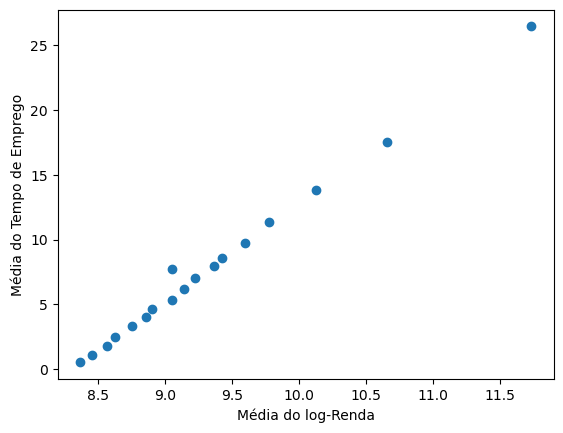

In [102]:
plt.scatter(tabela['Média do log-Renda'], tabela['Média do Tempo de Emprego'])
plt.xlabel('Média do log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.show()

<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
   <strong>Resposta:</strong> <br>
   As transformações realizadas aparentam trazer bons resultados, pois existe uma tendência linear no gráfico gerado.   
</div>

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


### Categorização

In [149]:
res_2 = smf.ols('renda ~ tempo_emprego_cat', df_train).fit()
print(f'R-quadrado Ajustado: {res_2.rsquared_adj:.2%}')
res_2.summary()

R-quadrado Ajustado: 24.10%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                 1.120e+04
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:10:26   Log-Likelihood:            -7.6760e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599982   BIC:                         1.535e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      6406.6151    500.723     12.795      0.000    5425.214    7388.016
tempo_emprego_cat[T.Interval(0.816, 1.458, closed='right')]     910.1575    709.325      1.283      0.199    -480.096    2300.411
tempo_emprego_cat[T.Interval(1.458, 2.096, closed='right')]    1630.4580    711.088      2.293      0.022     236.749    3024.167
tempo_emprego_cat[T.Interval(2.096, 2.912, closed='right')]    2268.2647    709.431      3.197      0.001     877.802    3658.727
tempo_emprego_cat[T.Interval(2.912, 3.636, closed='right')]    3355.7577    707.115      4.746      0.000    1969.834    4741.681
tempo_emprego_cat[T.Interval(3.636, 4.299, closed='right')]    4634.6162    711.759      6.511      0.000    3239.591    6029.641
tempo_emprego_cat[T.Interval(4.299, 4.934, closed='right')]    4989.5557    708.864      7.039      0.000    3600.206    6378.906
tempo_emprego_cat[T.Interval(4.934, 5.759, closed='right')]    6482.0538    709.562      9.135      0.000    5091.335    7872.772
tempo_emprego_cat[T.Interval(5.759, 6.622, closed='right')]    7452.5185    709.491     10.504      0.000    6061.939    8843.097
tempo_emprego_cat[T.Interval(6.622, 7.471, closed='right')]    8871.8479    709.949     12.496      0.000    7480.371    1.03e+04
tempo_emprego_cat[T.Interval(7.471, 7.746, closed='right')]    6339.9277    565.693     11.207      0.000    5231.187    7448.668
tempo_emprego_cat[T.Interval(7.746, 8.107, closed='right')]    1.099e+04    976.150     11.257      0.000    9075.233    1.29e+04
tempo_emprego_cat[T.Interval(8.107, 9.082, closed='right')]    1.245e+04    711.064     17.505      0.000    1.11e+04    1.38e+04
tempo_emprego_cat[T.Interval(9.082, 10.436, closed='right')]   1.581e+04    709.479     22.282      0.000    1.44e+04    1.72e+04
tempo_emprego_cat[T.Interval(10.436, 12.466, closed='right')]  1.942e+04    709.562     27.375      0.000     1.8e+04    2.08e+04
tempo_emprego_cat[T.Interval(12.466, 15.214, closed='right')]  3.061e+04    709.360     43.156      0.000    2.92e+04     3.2e+04
tempo_emprego_cat[T.Interval(15.214, 20.216, closed='right')]  6.029e+04    709.514     84.970      0.000    5.89e+04    6.17e+04
tempo_emprego_cat[T.Interval(20.216, 42.907, closed='right')]  2.276e+05    709.746    320.697      0.000    2.26e+05    2.29e+05
==============================================================================
Omnibus:                  1438315.159   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      30674628057.266
Skew:                          24.542   Prob(JB):                         0.00
Kurtosis:                    1109.606

### Transformações sobre Y

In [120]:
res_3 = smf.ols('''I(np.log(renda)) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda 
               + educacao + estado_civil + tipo_residencia + idade + tempo_emprego''',data=df_train).fit()

pred['transformacao_em_Y'] = res.predict(df_test)
pred['transformacao_em_Y_exp'] = np.exp(pred['transformacao_em_Y'])

print(f'R-quadrado: {res.rsquared_adj:.2%}')
res_3.summary()

R-quadrado: 24.50%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:49:56   Log-Likelihood:            -7.9751e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599977   BIC:                         1.595e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.9582      0.016    492.831      0.000       7.927       7.990
sexo[T.M]                            0.1354      0.003     48.565      0.000       0.130       0.141
posse_de_veiculo[T.S]                0.0059      0.003      2.208      0.027       0.001       0.011
posse_de_imovel[T.S]                 0.1856      0.003     71.600      0.000       0.181       0.191
tipo_renda[T.Bolsista]              -0.2184      0.052     -4.165      0.000      -0.321      -0.116
tipo_renda[T.Empresário]             0.1447      0.003     48.389      0.000       0.139       0.151
tipo_renda[T.Pensionista]           -0.2975      0.004    -69.731      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]       0.1336      0.004     30.339      0.000       0.125       0.142
educacao[T.Médio]                    0.0304      0.011      2.717      0.007       0.008       0.052
educacao[T.Pós graduação]            0.1559      0.038      4.088      0.000       0.081       0.231
educacao[T.Superior completo]        0.1238      0.011     10.936      0.000       0.102       0.146
educacao[T.Superior incompleto]      0.0434      0.013      3.425      0.001       0.019       0.068
estado_civil[T.Separado]             0.0238      0.005      4.571      0.000       0.014       0.034
estado_civil[T.Solteiro]             0.0053      0.004      1.431      0.153      -0.002       0.013
estado_civil[T.União]                0.0090      0.005      2.003      0.045       0.000       0.018
estado_civil[T.Viúvo]                0.0074      0.006      1.202      0.229      -0.005       0.019
tipo_residencia[T.Casa]             -0.0875      0.010     -8.588      0.000      -0.107      -0.068
tipo_residencia[T.Com os pais]      -0.0555      0.012     -4.804      0.000      -0.078      -0.033
tipo_residencia[T.Comunitário]      -0.1402      0.021     -6.823      0.000      -0.180      -0.100
tipo_residencia[T.Estúdio]          -0.1391      0.017     -8.106      0.000      -0.173      -0.105
tipo_residencia[T.Governamental]    -0.0930      0.012     -7.668      0.000      -0.117      -0.069
idade                                0.0040      0.000     27.229      0.000       0.004       0.004
tempo_emprego                        0.1290      0.000    619.797      0.000       0.129       0.129
==============================================================================
Omnibus:                     1085.526   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.641
Skew:                          -0.052   Prob(JB):                    3.06e-208
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================

### Transformações sobre X

In [128]:
# 2.2 Quadrado do Tempo de Emprego
res_4 = smf.ols('renda ~ I(tempo_emprego**2)', data=df_train).fit()
print("Quadrado do Tempo de Emprego")
print(f'R-quadrado (Treino): {res_4.rsquared:.2%}')

# 2.3 Interação Linear + Quadrático + Seno
res_5 = smf.ols('renda ~ tempo_emprego + I(tempo_emprego**2) + I(np.sin(tempo_emprego))', data=df_train).fit()
print("Linear + Quadrático + Seno")
print(f'R-quadrado (Treino): {res_5.rsquared:.2%}')

Quadrado do Tempo de Emprego
R-quadrado (Treino): 34.95%
Linear + Quadrático + Seno
R-quadrado (Treino): 37.39%


### Regressão segmentada

In [130]:
C1_range = np.arange(20, 50, 1) 

best_C1 = None
best_r_squared = -np.inf  
r_squared_values = []

for C1 in C1_range:
    df_train['tempo_emprego_1'] = (df_train.tempo_emprego <= C1) * df_train.tempo_emprego + (df_train.tempo_emprego > C1) * C1
    df_train['tempo_emprego_2'] = (df_train.tempo_emprego <= C1) * 0 + (df_train.tempo_emprego > C1) * (df_train.tempo_emprego - C1)
    
    res = smf.ols('renda ~ tempo_emprego_1', data=df_train).fit()
    
    r_squared_values.append(res.rsquared)
    
    if res.rsquared > best_r_squared:
        best_r_squared = res.rsquared
        best_C1 = C1

print(f"Best C1: {best_C1}")
print(f"Best R-squared: {best_r_squared:.2%}")

Best C1: 43
Best R-squared: 23.58%


In [131]:
C1=43

df_train['tempo_emprego_1'] = (df_train.tempo_emprego<=C1)*df_train.tempo_emprego + (df_train.tempo_emprego>C1)*C1
df_train['tempo_emprego_2'] = (df_train.tempo_emprego<=C1)*0 + (df_train.tempo_emprego>C1)*(df_train.tempo_emprego-C1)

df_test['tempo_emprego_1'] = (df_test.tempo_emprego<=C1)*df_test.tempo_emprego + (df_test.tempo_emprego>C1)*C1
df_test['tempo_emprego_2'] = (df_test.tempo_emprego<=C1)*0 + (df_test.tempo_emprego>C1)*(df_test.tempo_emprego-C1)

res_6 = smf.ols('renda ~ tempo_emprego_1',data=df_train).fit()
pred['regressão_segmentada1'] = res.predict(df_test)
print(f'R-quadrado: {res.rsquared:.2%}')
res_6.summary()

R-quadrado: 23.58%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 1.851e+05
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:52:11   Log-Likelihood:            -7.6780e+06
No. Observations:              600000   AIC:                         1.536e+07
Df Residuals:                  599998   BIC:                         1.536e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.356e+04    182.314   -184.055      0.000   -3.39e+04   -3.32e+04
tempo_emprego_1  7957.6772     18.494    430.278      0.000    7921.429    7993.925
==============================================================================
Omnibus:                  1425439.625   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28550038647.681
Skew:                          24.009   Prob(JB):                         0.00
Kurtosis:                    1070.565   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
def grid_search(df_train, C1_range, C2_range):
    best_r_squared = -np.inf
    best_C1 = None
    best_C2 = None
    
    for C1 in C1_range:
        for C2 in C2_range:
            df_train['tempo_emprego_1'] = (df_train.tempo_emprego <= C1) * df_train.tempo_emprego + (df_train.tempo_emprego > C1) * C1
            df_train['tempo_emprego_2'] = (df_train.tempo_emprego <= C1) * 0 + ((df_train.tempo_emprego > C1) & (df_train.tempo_emprego <= C2)) * (df_train.tempo_emprego - C1) + (df_train.tempo_emprego > C2) * (C2 - C1)
            df_train['tempo_emprego_3'] = (df_train.tempo_emprego <= C2) * 0 + (df_train.tempo_emprego > C2) * (df_train.tempo_emprego - C2)

            res = smf.ols('renda ~ tempo_emprego_1 + tempo_emprego_2 + tempo_emprego_3', data=df_train).fit()

            if res.rsquared > best_r_squared:
                best_r_squared = res.rsquared
                best_C1 = C1
                best_C2 = C2

    return best_C1, best_C2, best_r_squared

C1_range = np.arange(30, 50, 5)  
C2_range = np.arange(35, 60, 5)  

best_C1, best_C2, best_r_squared = grid_search(df_train, C1_range, C2_range)

print(f'Melhor C1: {best_C1}')
print(f'Melhor C2: {best_C2}')
print(f'R-quadrado: {best_r_squared:.2%}')

Melhor C1: 30
Melhor C2: 35
R-quadrado: 36.51%


In [139]:
C1=30
C2 = 35

df_train['tempo_emprego_1'] = (df_train.tempo_emprego<=C1)*df_train.tempo_emprego + (df_train.tempo_emprego>C1)*C1
df_train['tempo_emprego_2'] = (df_train.tempo_emprego<=C1)*0 + ((df_train.tempo_emprego>C1) & (df_train.tempo_emprego<=C2))*(df_train.tempo_emprego-C1) + (df_train.tempo_emprego>C2)*(C2-C1)
df_train['tempo_emprego_3'] = (df_train.tempo_emprego<=C2)*0 + (df_train.tempo_emprego>C2)*(df_train.tempo_emprego-C2)

df_test['tempo_emprego_1'] = (df_test.tempo_emprego<=C1)*df_test.tempo_emprego + (df_test.tempo_emprego>C1)*C1
df_test['tempo_emprego_2'] = (df_test.tempo_emprego<=C1)*0 + ((df_test.tempo_emprego>C1) & (df_test.tempo_emprego<=C2))*(df_test.tempo_emprego-C1) + (df_test.tempo_emprego>C2)*(C2-C1)
df_test['tempo_emprego_3'] = (df_test.tempo_emprego<=C2)*0 + (df_test.tempo_emprego>C2)*(df_test.tempo_emprego-C2)

res_7 = smf.ols('renda ~ tempo_emprego_1 + tempo_emprego_2 + tempo_emprego_3',data=df_train).fit()
pred['regressão_segmentada2'] = res.predict(df_test)
print(f'R-quadrado: {res.rsquared:.2%}')
res_7.summary()

R-quadrado: 23.58%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 1.150e+05
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:53:20   Log-Likelihood:            -7.6224e+06
No. Observations:              600000   AIC:                         1.524e+07
Df Residuals:                  599996   BIC:                         1.524e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.605e+04    174.145    -92.186      0.000   -1.64e+04   -1.57e+04
tempo_emprego_1  5253.0673     18.701    280.900      0.000    5216.414    5289.720
tempo_emprego_2  8.788e+04    412.340    213.124      0.000    8.71e+04    8.87e+04
tempo_emprego_3  4.489e+04    529.088     84.846      0.000    4.39e+04    4.59e+04
==============================================================================
Omnibus:                  1385101.394   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29429130020.882
Skew:                          22.258   Prob(JB):                         0.00
Kurtosis:                    1087.059   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Lowess


LOWESS - Avaliação na Base de Treino
R-quadrado (Treino): 33.63%


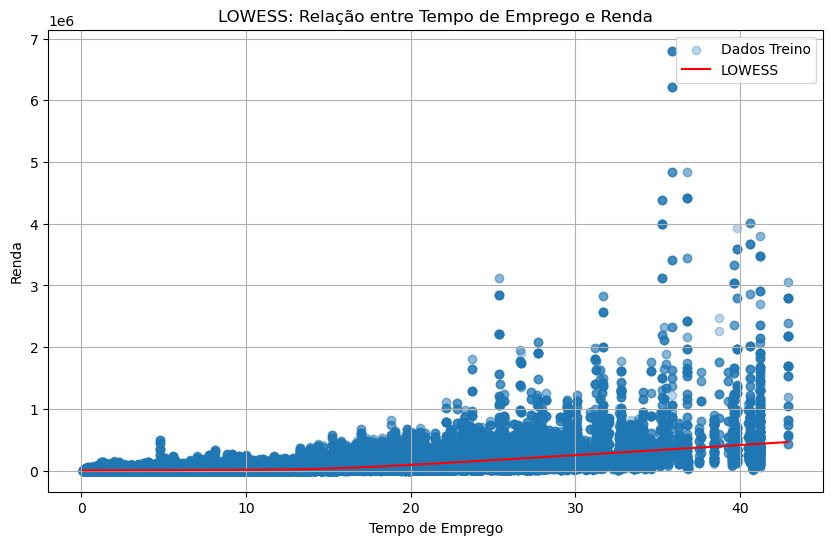

In [142]:
# --- Ajuste usando LOWESS na base de treino ---
lowess_treino = lowess(
    endog=df_train['renda'],
    exog=df_train['tempo_emprego'],
    frac=0.2  # Define a proporção de pontos usados para suavização (ajustar conforme necessário)
)

# --- Avaliação do LOWESS ---
# Predições na base de teste
df_train['renda_pred_lowess'] = np.interp(
    df_train['tempo_emprego'],
    df_train['tempo_emprego'].sort_values(),
    lowess_treino[:, 1]
)

# Cálculo do R-quadrado ajustado para LOWESS
ss_total = np.sum((df_train['renda'] - df_train['renda'].mean())**2)
ss_residual = np.sum((df_train['renda'] - df_train['renda_pred_lowess'])**2)
r2_lowess = 1 - (ss_residual / ss_total)

print("\nLOWESS - Avaliação na Base de Treino")
print(f'R-quadrado (Treino): {r2_lowess:.2%}')

# --- Visualização do LOWESS ---
plt.figure(figsize=(10, 6))
plt.scatter(df_train['tempo_emprego'], df_train['renda'], alpha=0.3, label="Dados Treino")
plt.plot(
    df_train['tempo_emprego'].sort_values(),
    df_train['renda_pred_lowess'][df_train['tempo_emprego'].sort_values().index],
    color="red",
    label="LOWESS"
)
plt.title('LOWESS: Relação entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.legend()
plt.grid(True)
plt.show()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [163]:
# Modelo 1: Linear Simples
modelo1_teste = smf.ols('renda ~ tempo_emprego', data=df_test).fit()
print("\nModelo 1 - Linear Simples na Base de Teste")
print(f'R-quadrado (Teste): {modelo1_teste.rsquared:.2%}')

# Modelo 2: Categorização
df_test['tempo_emprego_cat'] = pd.cut( df_test['tempo_emprego'], bins=quebras, include_lowest=True)
modelo2_teste = smf.ols('renda ~ tempo_emprego_cat', data=df_test).fit()
print("\nModelo 2 - Categorização")
print(f"R² na base de teste: {modelo2_teste.rsquared:.2%}")

# Modelo 3: Log-transformação
modelo3_teste = smf.ols('''I(np.log(renda)) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda 
               + educacao + estado_civil + tipo_residencia + idade + tempo_emprego''', data=df_test).fit()
print("\nModelo 3 - Log-Transformação na Base de Teste")
print(f'R-quadrado (Teste): {modelo3_teste.rsquared:.2%}')

# Modelo 4: Quadrado do Tempo de Emprego
modelo4_teste = smf.ols('renda ~ I(tempo_emprego**2)', data=df_test).fit()
print("\nModelo 4 - Quadrado do Tempo de Emprego na Base de Teste")
print(f'R-quadrado (Teste): {modelo4_teste.rsquared:.2%}')

# Modelo 5: Linear + Quadrático + Seno
modelo5_teste = smf.ols('renda ~ tempo_emprego + I(tempo_emprego**2) + I(np.sin(tempo_emprego))', data=df_test).fit()
print("\nModelo 5 - Linear + Quadrático + Seno na Base de Teste")
print(f'R-quadrado (Teste): {modelo5_teste.rsquared:.2%}')

# Modelo 6: Regressão Segmentada (1 Ponto de Corte)
C1=43
df_test['X1_1'] = np.where(df_test.tempo_emprego <= C1, df_test.tempo_emprego, C1)
df_test['X1_2'] = np.where(df_test.tempo_emprego <= C1, 0, df_test.tempo_emprego - C1)

modelo6_teste = smf.ols('renda ~ X1_1 + X1_2', data=df_test).fit()
print("\nModelo 6 - Regressão Segmentada (1 Corte) na Base de Teste")
print(f'R-quadrado (Teste): {modelo6_teste.rsquared:.2%}')

# Modelo 7: Regressão Segmentada (2 Pontos de Corte)
C1=30
C2 = 35
df_test['X1_3'] = np.where(df_test.tempo_emprego <= C2, 0, df_test.tempo_emprego - C2)

modelo7_teste = smf.ols('renda ~ X1_1 + X1_2 + X1_3', data=df_test).fit()
print("\nModelo 7 - Regressão Segmentada (2 Cortes) na Base de Teste")
print(f'R-quadrado (Teste): {modelo7_teste.rsquared:.2%}')

#LOWESS
# --- Aplicação na base de teste ---
lowess_teste = lowess(
    endog=df_test['renda'],
    exog=df_test['tempo_emprego'],
    frac=0.2
)

# --- Avaliação do LOWESS ---
# Predições na base de teste
df_test['renda_pred_lowess'] = np.interp(
    df_test['tempo_emprego'],
    df_test['tempo_emprego'].sort_values(),
    lowess_teste[:, 1]
)

# Cálculo do R-quadrado ajustado para LOWESS
ss_total = np.sum((df_test['renda'] - df_test['renda'].mean())**2)
ss_residual = np.sum((df_test['renda'] - df_test['renda_pred_lowess'])**2)
r2_lowess = 1 - (ss_residual / ss_total)

print("\nModelo 8 - LOWESS avaliação na Base de Teste")
print(f'R-quadrado (Teste): {r2_lowess:.2%}')


Modelo 1 - Linear Simples na Base de Teste
R-quadrado (Teste): 30.57%

Modelo 2 - Categorização
R² na base de teste: 30.96%

Modelo 3 - Log-Transformação na Base de Teste
R-quadrado (Teste): 54.78%

Modelo 4 - Quadrado do Tempo de Emprego na Base de Teste
R-quadrado (Teste): 46.00%

Modelo 5 - Linear + Quadrático + Seno na Base de Teste
R-quadrado (Teste): 49.56%

Modelo 6 - Regressão Segmentada (1 Corte) na Base de Teste
R-quadrado (Teste): 30.57%

Modelo 7 - Regressão Segmentada (2 Cortes) na Base de Teste
R-quadrado (Teste): 43.69%

Modelo 8 - LOWESS avaliação na Base de Teste
R-quadrado (Teste): 45.01%


<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
   <strong>Resposta:</strong> <br>
   A transformação sobre Y obteve mais impacto no $R^2$ ajustado na base de teste do que as outras técnicas.
   
</div>